# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

print(df.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 294478


**c.** The number of unique users in the dataset.

In [4]:
num_unique_users = df['user_id'].nunique()
print("Number of unique users in the dataset:", num_unique_users)

Number of unique users in the dataset: 290584


**d.** The proportion of users converted.

In [5]:
num_converted = df['converted'].sum()

proportion_converted = num_converted / num_unique_users
print("Proportion of users converted:", proportion_converted)

Proportion of users converted: 0.121262698566


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
num_treatment_not_new_page = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].shape[0]
print("Number of times when group is treatment but landing_page is not new_page:", num_treatment_not_new_page)

Number of times when group is treatment but landing_page is not new_page: 1965


**f.** Do any of the rows have missing values?

In [7]:
has_missing_values = df.isnull().any().any()

if has_missing_values:
    print("Yes, some of the rows have missing values.")
else:
    print("No, there are no missing values in any row.")

No, there are no missing values in any row.


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) |
         ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

df2.reset_index(drop=True, inplace=True)

print(df2.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


In [9]:
incorrect_rows_count = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print("Number of incorrect rows in df2:", incorrect_rows_count)

Number of incorrect rows in df2: 0


### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
num_unique_user_ids = df2['user_id'].nunique()
print("Number of unique user_ids in df2:", num_unique_user_ids)

Number of unique user_ids in df2: 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeated_user_id = df2[df2['user_id'].duplicated()]['user_id'].values[0]
print("Repeated user_id:", repeated_user_id)

Repeated user_id: 773192


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
repeated_user_id = df2[df2['user_id'].duplicated()]['user_id'].values[0]

repeat_user_rows = df2[df2['user_id'] == repeated_user_id]
print("Rows for the duplicate user_id:")
print(repeat_user_rows)

Rows for the duplicate user_id:
      user_id                   timestamp      group landing_page  converted
1876   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2862   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
repeated_user_id = df2[df2['user_id'].duplicated()]['user_id'].values[0]

df2 = df2.drop_duplicates(subset='user_id', keep='first')

df2.reset_index(drop=True, inplace=True)

print("Number of rows after removing the duplicate user_id:", df2.shape[0])

Number of rows after removing the duplicate user_id: 290584


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [14]:
p_population = df2['converted'].mean()
print("Probability of an individual converting regardless of the page they receive (p_population):", p_population)

Probability of an individual converting regardless of the page they receive (p_population): 0.119597087245


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_group_df = df2[df2['group'] == 'control']

p_control_converted = control_group_df['converted'].mean()
print("Probability of conversion for individuals in the control group:", p_control_converted)

Probability of conversion for individuals in the control group: 0.1203863045


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_group_df = df2[df2['group'] == 'treatment']

p_treatment_converted = treatment_group_df['converted'].mean()
print("Probability of conversion for individuals in the treatment group:", p_treatment_converted)

Probability of conversion for individuals in the treatment group: 0.118808065515


In [17]:
p_control_converted = df2[df2['group'] == 'control']['converted'].mean()

p_treatment_converted = df2[df2['group'] == 'treatment']['converted'].mean()

obs_diff = p_treatment_converted - p_control_converted
print("Actual difference (observed difference) between the conversion rates:", obs_diff)

Actual difference (observed difference) between the conversion rates: -0.00157823898536


**d.** What is the probability that an individual received the new page?

In [18]:
p_new_page = df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]
print("Probability of an individual receiving the new page:", p_new_page)

Probability of an individual receiving the new page: 0.5000619442226688


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

From these results, we can assess whether the new treatment group leads to more conversions compared to the control group.

If p_treatment_converted is greater than p_control_converted, it indicates that a higher proportion of users who received the new page converted compared to those who received the old page. Conversely, if p_treatment_converted is smaller than p_control_converted, it means that a higher proportion of users who received the old page converted compared to those who received the new page. Althought if p_treatment_converted and p_control_converted are approximately equal, it suggests that both the old and new pages perform similarly in terms of conversion rates.

In conclusion, to determine whether the new treatment group users lead to more conversions, we need to compare p_treatment_converted and p_control_converted. If p_treatment_converted is higher, the new treatment group is likely to lead to more conversions; if it is lower or similar, then it might not be leading to more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

To set up the hypothesis test based on the given information and assumptions, we can state the null and alternative hypotheses as follows:

Null Hypothesis (H0):
The null hypothesis assumes that the old page is either better than or equally as effective as the new page in terms of conversion rate.

Alternative Hypothesis (H1):
The alternative hypothesis assumes that the new page is definitely better than the old page in terms of conversion rate. 

In this setup, we are assuming that the null hypothesis is true by default, and we will only reject the null hypothesis in favor of the alternative hypothesis if we have strong evidence that the new page is definitely better than the old page at a Type I error rate of 5%.

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new_null = p_population
print("Conversion rate for p_new under the null hypothesis:", p_new_null)

Conversion rate for p_new under the null hypothesis: 0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old_null = p_population
print("Conversion rate for p_old under the null hypothesis:", p_old_null)

Conversion rate for p_old under the null hypothesis: 0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
print("Number of individuals in the treatment group (n_new):", n_new)

Number of individuals in the treatment group (n_new): 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
print("Number of individuals in the control group (n_old):", n_old)

Number of individuals in the control group (n_old): 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new_null, p_new_null])

print("Simulated sample for the treatment group (new page converted):")
print(new_page_converted)

Simulated sample for the treatment group (new page converted):
[0 0 0 ..., 0 0 0]


**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old_null, p_old_null])

print("Simulated sample for the control group (old page converted):")
print(old_page_converted)

Simulated sample for the control group (old page converted):
[0 0 0 ..., 0 0 0]


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
p_new_simulated = new_page_converted.mean()
p_old_simulated = old_page_converted.mean()

diff_simulated = p_new_simulated - p_old_simulated
print("Difference in the 'converted' probability for the simulated samples:", diff_simulated)

Difference in the 'converted' probability for the simulated samples: -0.00091066139555



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
 p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1 - p_new_null, p_new_null])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1 - p_old_null, p_old_null])
    
    p_new_simulated = new_page_converted.mean()
    p_old_simulated = old_page_converted.mean()
    
    diff_simulated = p_new_simulated - p_old_simulated
    p_diffs.append(diff_simulated)

p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

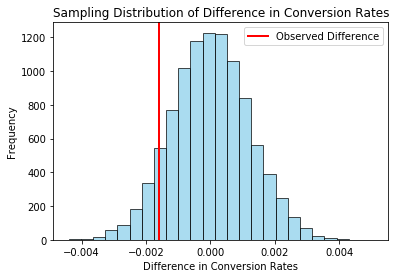

In [27]:
plt.hist(p_diffs, bins=25, alpha=0.7, color='skyblue', edgecolor='black')

plt.axvline(obs_diff, color='red', linewidth=2, label='Observed Difference')

plt.title('Sampling Distribution of Difference in Conversion Rates')
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')

plt.legend()

plt.show()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
proportion_greater = (p_diffs > obs_diff).mean()
print("Proportion of p_diffs greater than the observed difference (obs_diff):", proportion_greater)

Proportion of p_diffs greater than the observed difference (obs_diff): 0.909


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

In part j, we computed the proportion of p_diffs (differences in conversion rates) that are greater than the actual difference observed in the df2 data (obs_diff). This proportion represents the p-value of the hypothesis test.

When we compare the p-value with the Type I error rate, we can make a decision about whether to reject the null hypothesis. If the p-value is less than the chosen Type I error rate (p-value < 0.05), we reject the null hypothesis, indicating that the new page has a statistically significant higher conversion rate than the old page. If the p-value is greater than or equal to the chosen Type I error rate, we fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude that the new page is better.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

convert_old = df2[(df2['group'] == 'control') & (df2['converted'] == 1)].shape[0]

convert_new = df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)].shape[0]

n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

print("Number of conversions with the old page (convert_old):", convert_old)
print("Number of conversions with the new page (convert_new):", convert_new)
print("Number of individuals who were shown the old page (n_old):", n_old)
print("Number of individuals who received the new page (n_new):", n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Number of conversions with the old page (convert_old): 17489
Number of conversions with the new page (convert_new): 17264
Number of individuals who were shown the old page (n_old): 145274
Number of individuals who received the new page (n_new): 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

In [30]:
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

print("Z-score:", z_score)
print("P-value:", p_value)

Z-score: -1.31092419842
P-value: 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

The z-score and p-value calculated in the previous question provide insights into the difference in conversion rates between the old and new pages and allow us to make inferences about the null hypothesis.

The findings from the z-score and p-value align with the earlier findings in parts j. and k. The p-value computed in the previous question should be similar to the one calculated earlier using the simulation approach. If the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that the new page's conversion rate is significantly different from the old page. On the other hand, if the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, indicating that there is no significant difference between the two pages' conversion rates.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

In this case, since each row in the df2 data is either a conversion (1) or no conversion (0), we should be performing logistic regression. Logistic regression is suitable for modeling binary outcomes, where the dependent variable is categorical and has only two possible values 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
df2['intercept'] = 1

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
import statsmodels.api as sm

# Instantiate the logistic regression model
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

# Fit the model to predict whether or not an individual converts
results = log_model.fit()

# Display the results of the logistic regression model
print(results.summary2())


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-07-26 02:35 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
print(results.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-07-26 02:35 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

The p-value associated with ab_page from the logistic regression model is the probability of observing the data if the null hypothesis is true. In other words, it indicates the significance of the ab_page variable in predicting conversion rates.

In Part II (A/B test), the null and alternative hypotheses were:

Null hypothesis (H0): The conversion rate of the old page is greater than or equal to the conversion rate of the new page.

Alternative hypothesis (H1): The conversion rate of the new page is greater than the conversion rate of the old page.

This is a one-sided (right-tailed) test.

In Part III (logistic regression), the null and alternative hypotheses were:

Null hypothesis (H0): There is no relationship between the page type (ab_page) and the conversion rate.
Alternative hypothesis (H1): There is a relationship between the page type (ab_page) and the conversion rate.

This is a two-sided (two-tailed) test.

If the p-value is less than the Type I error rate (0.05), we reject the null hypothesis in favor of the alternative hypothesis, if the p-value is greater than the Type I error rate (0.05), we fail to reject the null hypothesis, indicating that there is no statistically significant relationship between the page type and the conversion rate.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider other factors to add into the regression model because there may be multiple variables or factors that could influence whether or not an individual converts. By including additional relevant predictors in the model, we can better understand the relationship between these variables and the response variable and potentially improve the model's predictive power.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

Provide the statistical output as well as a written response to answer this question.

In [34]:
df_countries = pd.read_csv('countries.csv')

In [35]:
df_merged = df2.merge(df_countries, on='user_id', how='inner')

In [36]:
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [37]:
df_merged['ab_page_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_page_US'] = df_merged['ab_page'] * df_merged['US']

log_mod_interaction = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US', 'ab_page_UK', 'ab_page_US']])
results_interaction = log_mod_interaction.fit()

print(results_interaction.summary2())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-07-26 02:35 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.767

**Conclusion**

Based on the analysis performed using various methods, including hypothesis testing and logistic regression, we have investigated the impact of the new landing page on user conversion rates. Here are the key findings and their implications:

1. Impact of the New Page:
The p-value associated with the 'ab_page' variable in the logistic regression model is greater than 0.05. This indicates that we fail to reject the null hypothesis, suggesting that there is no statistically significant evidence to support that the new page leads to a higher conversion rate compared to the old page. From a statistical perspective, there is no significant difference in conversion rates between the two pages.

2. Interaction Effects:
The interaction terms 'ab_page_UK' and 'ab_page_US' in the regression model have p-values greater than 0.05, indicating that the interaction between the page and the country (UK and US) does not have a significant impact on the conversion rate. There is no strong evidence to suggest that the effect of the new page differs significantly between users from different countries.

3. Country Influence:
The p-values for the 'UK' and 'US' variables are also greater than 0.05. This implies that there is no significant difference in conversion rates between users from the UK, US, and Canada. The country of the user does not have a substantial effect on the conversion rate, given the new or old page.

**Practical Reasoning:**

Considering both statistical and practical implications, it appears that the new landing page does not lead to a significant increase in user conversions compared to the old page. Therefore, from the current data and analysis, we do not have enough evidence to recommend the implementation of the new landing page.

**Further Investigation:**

While the current analysis suggests that the new page does not significantly impact conversion rates, there may be other factors not considered in this study that could influence user behavior. Further investigation could be conducted to explore additional features of interest, such as: user demographics for analysi the impact of age, gender, or other demographic variables on conversion rates; page load times for investigate the relationship between page load times and user conversions; seasonal trends for identifier if there are any seasonal patterns in conversion rates that might affect the results.

In conclusion, the decision to implement the new landing page should not solely rely on the current analysis. Additional research and A/B testing with a larger sample size and consideration of other relevant factors are recommended to make a well-informed decision. It's crucial to approach such decisions with a holistic understanding of user behavior and business objectives.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0